In [311]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test3 import Test
from bitalg.visualizer.main import Visualizer
import decimal
import pygame
import time
decimal.getcontext().prec = 64

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [312]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(4, 1), (2, 2), (3, 5), (4, 7), (6, 6), (3, 9), (6, 8), (9, 10), (7, 4), (4, 3), (5, 0)]
polygon_example_colors = [4,4,4,4,3,0,2,0,4,4,1]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[6], polygon_example_1[3]),
                      (polygon_example_1[2], polygon_example_1[4]),]
       

In [313]:
def draw_polygon(polygon):
    vis = Visualizer()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.add_point(polygon, color=['green'])
    vis.show()


In [314]:
def draw_polygon_colors(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()


In [315]:
def draw_polygon_tri(polygon,tri):

    vis = Visualizer()
    vis.clear()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()


## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

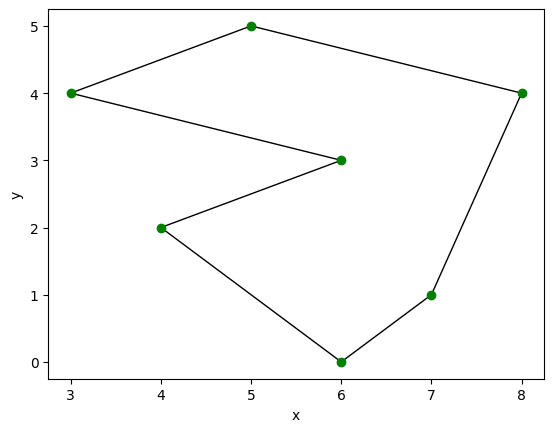

In [316]:
draw_polygon(polygon_example_1)

Do tego celu wygeneruj wielokąt.

In [1]:
def Set_points_using_mouse():    
    pygame.init()
    
    SCREEN_WIDTH=800
    SCREEN_HEIGHT=600
    
    screen=pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))
    
    buttom=pygame.Rect((100,500,120,40))
    nr_points=0
    points=[]
    first=True
    run=True
    
    while run:
        pygame.draw.rect(screen, (255,0,0), buttom)
        font = pygame.font.SysFont(None, 24)
        img = font.render('End Polygon', True, (255,255,255))
        screen.blit(img, (110, 510))
        
        for event in pygame.event.get():
            if event.type==pygame.QUIT:
                points.clear()
                run=False
            if event.type == pygame.MOUSEBUTTONUP:
                nr_points+=1
                if first==False:
                    pos_prev=pos
                pos = pygame.mouse.get_pos()
                if 100<=pos[0]<=220 and 500<=pos[1]<=540 and nr_points>=3:
                    run=False
                    pygame.draw.line(screen,(255,0,0),pos_first,pos_prev)
                    pygame.display.update()
                    time.sleep(0.5)
                    break
                points.append(pos)
                pygame.draw.circle(screen,(255,0,0),pos,5)
                if first==False:
                    pygame.draw.line(screen,(255,0,0),pos,pos_prev)
                else:
                    pos_first=pos
                    first=False
    
        pygame.display.update()
    
    pygame.quit()

    return points


In [ ]:
#Zamknięcie programu przyciskiem "x" spowoduje zwtócenie pustej tablicy
points=Set_points_using_mouse()
print (points)

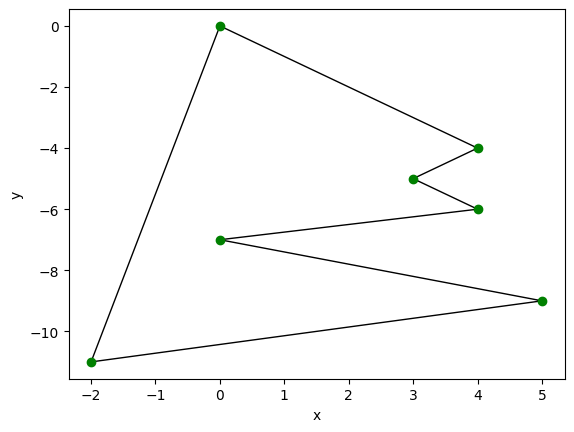

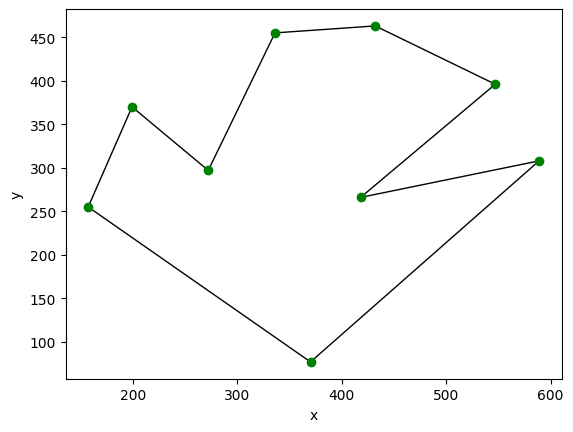

In [327]:
#polygon = # your polygon
polygon_mine=[(-2,-11),(5,-9),(0,-7),(4,-6),(3,-5),(4,-4),(0,0)]
polygon_mine2=[(370, 77), (157, 255), (199, 370), (272, 297), (336, 455), (432, 463), (547, 396), (418, 266), (589, 308)]
draw_polygon(polygon_mine)
draw_polygon(polygon_mine2)

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [295]:
def Set_points_using_mouse():    
    pygame.init()
    
    SCREEN_WIDTH=800
    SCREEN_HEIGHT=600
    
    screen=pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))
    
    buttom=pygame.Rect((100,500,120,40))
    nr_points=0
    points=[]
    first=True
    run=True
    
    while run:
        pygame.draw.rect(screen, (255,0,0), buttom)
        font = pygame.font.SysFont(None, 24)
        img = font.render('End Polygon', True, (255,255,255))
        screen.blit(img, (110, 510))
        
        for event in pygame.event.get():
            if event.type==pygame.QUIT:
                run=False
            if event.type == pygame.MOUSEBUTTONUP:
                nr_points+=1
                if first==False:
                    pos_prev=pos
                pos = pygame.mouse.get_pos()
                if 100<=pos[0]<=220 and 500<=pos[1]<=540 and nr_points>=3:
                    run=False
                    if nr_points>=3:
                        pygame.draw.line(screen,(255,0,0),pos_first,pos_prev)
                        pygame.display.update()
                        time.sleep(0.5)
                    break
                points.append(pos)
                pygame.draw.circle(screen,(255,0,0),pos,5)
                if first==False:
                    pygame.draw.line(screen,(255,0,0),pos,pos_prev)
                else:
                    pos_first=pos
                    first=False
    
        pygame.display.update()
    
    pygame.quit()


In [296]:
def is_y_monotonic(polygon):
    min_y=min(polygon, key=lambda x:x[0])
    max_y=max(polygon, key=lambda x:x[1])
    n=len(polygon)

    if n<4: return True

    max_val=polygon[0][1]
    max_idx=0
    for i in range (1,n):
        if polygon[i][1]>max_val:
            max_val=polygon[i][1]
            max_idx=i

    min_val=polygon[0][1]
    min_idx=0
    for i in range (1,n):
        if polygon[i][1]<min_val:
            min_val=polygon[i][1]
            min_idx=i  

    i=max_idx+1
    if i==n:
        i=0
    orient_up=False
    while i!=max_idx:
        if orient_up==False:
            if i==0:
                if polygon[i][1]>polygon[n-1][1]:
                    return False
            else:
                if polygon[i][1]>polygon[i-1][1]:
                    return False
        else:
            if i==n:
                i=0
                if polygon[i][1]<polygon[n-1][1]:
                    return False
            else:
                if polygon[i][1]<polygon[i-1][1]:
                    return False            
        if i==min_idx:
            orient_up=True
        i+=1
        if i==n:
            i=0

    return True
        

    
    """
    Funkcja określa czy podana figura jest y-monotoniczna.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: wartość bool - true, jeśli wielokąt jest monotoniczny i false jeśli nie jest
    """

    raise Exception("Unimplemented")
    

Przeprowadź test poprawności powyższej funkcji.

In [297]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.016s


Sprawdź monotoniczność swojego wielokątu.

In [298]:
print(is_y_monotonic(polygon_mine))

True


***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których wielokąt zaczyna się monotoniczny spadek 
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji. 
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny. 
- prawdiłowy, pozostałe przypadki, jeden sąsiad powyżej drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

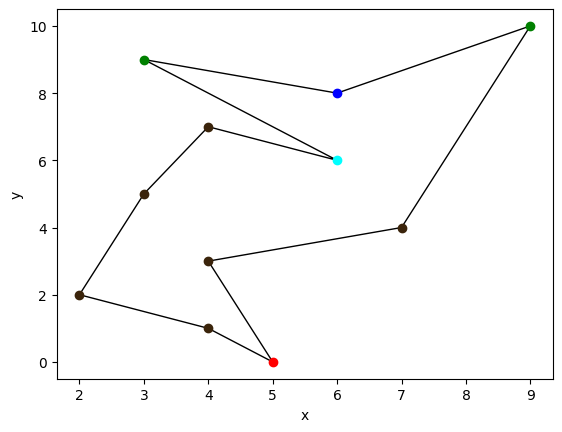

In [299]:
draw_polygon_colors(polygon_example_2,polygon_example_colors)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [300]:
def orient (a,b,c):
    # Występuje tu zamiana typu danych na dokładność do 64 liczb miejsc po przecinku
    eps=1e-30
    new_a=(decimal.Decimal(a[0]),decimal.Decimal(a[1]))
    new_b=(decimal.Decimal(b[0]),decimal.Decimal(b[1]))
    new_c=(decimal.Decimal(c[0]),decimal.Decimal(c[1]))
    det=(new_b[0]-new_a[0])*(new_c[1]-new_b[1])-(new_b[1]-new_a[1])*(new_c[0]-new_b[0])
    if abs(det)<eps:
        return 0
    elif det>0:
        return 1
    else:
        return -1

def Check_color(prev_p,curr_p,next_p):
    orientation=orient(prev_p,curr_p,next_p)
    if prev_p[1]>curr_p[1] and next_p[1]>curr_p[1]:
        if orientation<0:
            return 2
        else:
            return 1
    elif prev_p[1]<curr_p[1] and next_p[1]<curr_p[1]:
        if orientation<0:
            return 3
        else:
            return 0
    return 4


def color_vertex(polygon):
    n=len(polygon)
    colors=[0 for _ in range (n)]
    colors[0]=Check_color(polygon[n-1],polygon[0],polygon[1])
    colors[n-1]=Check_color(polygon[n-2],polygon[n-1],polygon[0])
    for i in range (1,n-1):
        colors[i]=Check_color(polygon[i-1],polygon[i],polygon[i+1])
    return colors
    
    
    """

    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawdiłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """
    

    raise Exception("Unimplemented")

Przeprowadź test poprawności powyższej funkcji. 

In [301]:
Test().runtest(2, color_vertex)

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.016s


Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

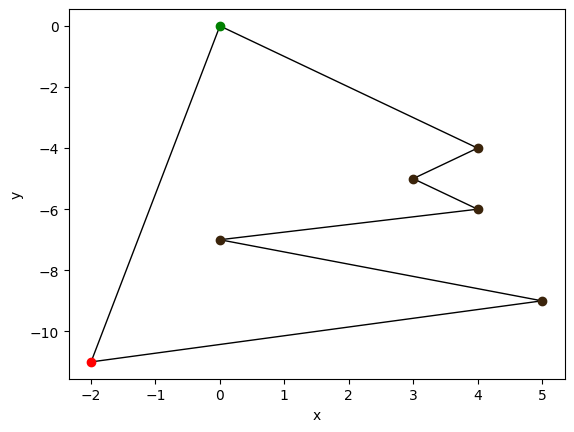

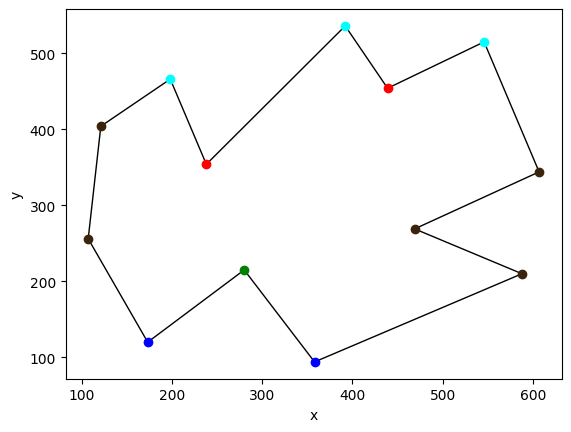

In [329]:
polygon=polygon_mine.copy()
colors = color_vertex(polygon)
draw_polygon_colors(polygon,colors)
polygon_mine3=[(358, 94), (280, 215), (173, 120), (107, 256), (121, 404), (198, 466), (238, 354), (392, 536), (439, 454), (546, 515), (607, 344), (469, 269), (588, 210)]
polygon=polygon_mine3.copy()
colors = color_vertex(polygon)
draw_polygon_colors(polygon,colors)

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

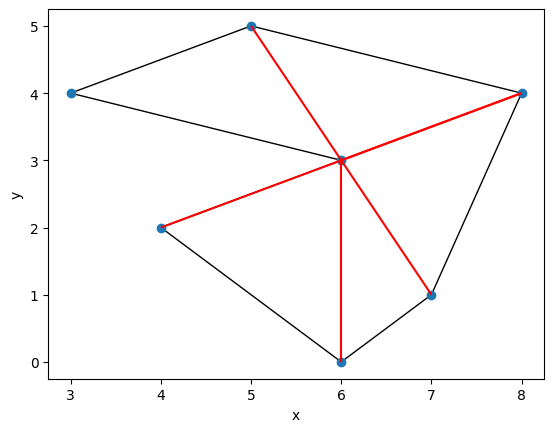

In [303]:
draw_polygon_tri(polygon_example_1,polygon_example_tri)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [304]:
# Zwykła funkcja na triangulacje

def orient (a,b,c):
    # Występuje tu zamiana typu danych na dokładność do 64 liczb miejsc po przecinku
    eps=1e-30
    new_a=(decimal.Decimal(a[0]),decimal.Decimal(a[1]))
    new_b=(decimal.Decimal(b[0]),decimal.Decimal(b[1]))
    new_c=(decimal.Decimal(c[0]),decimal.Decimal(c[1]))
    det=(new_b[0]-new_a[0])*(new_c[1]-new_b[1])-(new_b[1]-new_a[1])*(new_c[0]-new_b[0])
    if abs(det)<eps:
        return 0
    elif det>0:
        return 1
    else:
        return -1


def neighbour(idx,set_ch,n,polygon):
    if polygon[(idx-1+n)%n]==set_ch:
        return True
    if polygon[(idx+1)%n]==set_ch:
        return True
    return False


def triangulation_real(polygon):
    draw_polygon(polygon)
    n=len(polygon)
    diagonal=[]
    diagonal_draw=[]
    polygon_extend=[]
    for i in range (n):
        polygon_extend.append((polygon[i],i))

    max_val=polygon[0][1]
    max_idx=0
    for i in range (1,n):
        if polygon[i][1]>max_val:
            max_val=polygon[i][1]
            max_idx=i

    min_val=polygon[0][1]
    min_idx=0
    for i in range (1,n):
        if polygon[i][1]<min_val:
            min_val=polygon[i][1]
            min_idx=i  

    left=[max_val]
    right=[]
    on_left=[True for i in range (n)]
    i=max_idx+1
    if i==n:
        i=0
    orient_up=False
    while i!=max_idx:
        if orient_up==False:
            left.append(polygon[i])
        else:
            right.append(polygon[i])
            on_left[i]=False
        if i==min_idx:
            orient_up=True
        i+=1
        if i==n:
            i=0

    Q=[(polygon[max_idx], max_idx)]
    by_left=max_idx+1
    if by_left==n:
        by_left=0
    by_right=max_idx-1
    if by_right==-1:
        by_right=n-1
        
    while by_left!=min_idx and by_right!=min_idx:
        if polygon[by_left][1]>polygon[by_right][1]:
            Q.append((polygon[by_left], by_left))
            by_left+=1
            if by_left==n:
                by_left=0
        else:
            Q.append((polygon[by_right], by_right))
            by_right-=1
            if by_right==-1:
                by_right=n-1

    while by_left!=min_idx:
        Q.append((polygon[by_left], by_left))
        by_left+=1
        if by_left==n:
            by_left=0

    while by_right!=min_idx:
        Q.append((polygon[by_right], by_right))
        by_right-=1
        if by_right==-1:
            by_right=n-1 

    Q.append((polygon[min_idx], min_idx))
    
    on_set=[Q[0],Q[1]]

    for i in range (2,len(Q)):
        line_curr=on_left[Q[i][1]]
        line_last=on_left[on_set[len(on_set)-1][1]]
        if (line_curr==True and line_last==True) or (line_curr==False and line_last==False):
            while len(on_set)>1:
                orientation=orient(on_set[len(on_set)-2][0],on_set[len(on_set)-1][0],Q[i][0])
                side=on_left[on_set[len(on_set)-1][1]]
                if ((orientation>0 and side==True) or (orientation<0 and side==False)) and neighbour(Q[i][1],on_set[len(on_set)-2][0],n,polygon)==False:
                    diagonal.append((on_set[len(on_set)-2][1],Q[i][1]))
                    diagonal_draw.append((on_set[len(on_set)-2][0],Q[i][0]))
                    on_set.pop()
                else:
                    break
            on_set.append(Q[i]) 
        else:
            for j in range (len(on_set)-1,-1,-1):
                if neighbour(Q[i][1],on_set[j][0],n,polygon)==False:
                    diagonal.append((on_set[j][1],Q[i][1]))
                    diagonal_draw.append((on_set[j][0],Q[i][0]))
            last=on_set[len(on_set)-1]
            on_set.clear()
            on_set.append(last)
            on_set.append(Q[i])

    return diagonal

            
    """

    Funkcja dokonuje triangulacji wielokąta monotonicznego. 
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki 1-5 i 2-3
    """

#polygon=polygon_mine.copy()
#triangulation(polygon)

In [305]:
# Rysuje triangulacje

def orient (a,b,c):
    # Występuje tu zamiana typu danych na dokładność do 64 liczb miejsc po przecinku
    eps=1e-30
    new_a=(decimal.Decimal(a[0]),decimal.Decimal(a[1]))
    new_b=(decimal.Decimal(b[0]),decimal.Decimal(b[1]))
    new_c=(decimal.Decimal(c[0]),decimal.Decimal(c[1]))
    det=(new_b[0]-new_a[0])*(new_c[1]-new_b[1])-(new_b[1]-new_a[1])*(new_c[0]-new_b[0])
    if abs(det)<eps:
        return 0
    elif det>0:
        return 1
    else:
        return -1


def neighbour(idx,set_ch,n,polygon):
    if polygon[(idx-1+n)%n]==set_ch:
        return True
    if polygon[(idx+1)%n]==set_ch:
        return True
    return False


def triangulation2(polygon):
    draw_polygon(polygon)
    n=len(polygon)
    diagonal=[]
    diagonal_draw=[]
    polygon_extend=[]
    for i in range (n):
        polygon_extend.append((polygon[i],i))

    max_val=polygon[0][1]
    max_idx=0
    for i in range (1,n):
        if polygon[i][1]>max_val:
            max_val=polygon[i][1]
            max_idx=i

    min_val=polygon[0][1]
    min_idx=0
    for i in range (1,n):
        if polygon[i][1]<min_val:
            min_val=polygon[i][1]
            min_idx=i  

    left=[max_val]
    right=[]
    on_left=[True for i in range (n)]
    i=max_idx+1
    if i==n:
        i=0
    orient_up=False
    while i!=max_idx:
        if orient_up==False:
            try:
                left.append(polygon[i])
            except:
                print ("aaa")
                print (max_idx)
                print (n)
                print (i)
        else:
            right.append(polygon[i])
            on_left[i]=False
        if i==min_idx:
            orient_up=True
        i+=1
        if i==n:
            i=0


    Q=[(polygon[max_idx], max_idx)]
    by_left=max_idx+1
    if by_left==n:
        by_left=0
    by_right=max_idx-1
    if by_right==-1:
        by_right=n-1
        
    while by_left!=min_idx and by_right!=min_idx:
        if polygon[by_left][1]>polygon[by_right][1]:
            Q.append((polygon[by_left], by_left))
            by_left+=1
            if by_left==n:
                by_left=0
        else:
            Q.append((polygon[by_right], by_right))
            by_right-=1
            if by_right==-1:
                by_right=n-1

    while by_left!=min_idx:
        Q.append((polygon[by_left], by_left))
        by_left+=1
        if by_left==n:
            by_left=0

    while by_right!=min_idx:
        Q.append((polygon[by_right], by_right))
        by_right-=1
        if by_right==-1:
            by_right=n-1 

    Q.append((polygon[min_idx], min_idx))

    
    on_set=[Q[0],Q[1]]

    for i in range (2,len(Q)):
        line_curr=on_left[Q[i][1]]
        line_last=on_left[on_set[len(on_set)-1][1]]
        if (line_curr==True and line_last==True) or (line_curr==False and line_last==False):
            while len(on_set)>1:
                orientation=orient(on_set[len(on_set)-2][0],on_set[len(on_set)-1][0],Q[i][0])
                side=on_left[on_set[len(on_set)-1][1]]
                if ((orientation>0 and side==True) or (orientation<0 and side==False)) and neighbour(Q[i][1],on_set[len(on_set)-2][0],n,polygon)==False:
                    diagonal.append((on_set[len(on_set)-2][1],Q[i][1]))
                    diagonal_draw.append((on_set[len(on_set)-2][0],Q[i][0]))
                    on_set.pop()
                else:
                    break
            on_set.append(Q[i]) 
        else:
            for j in range (len(on_set)-1,-1,-1):
                if neighbour(Q[i][1],on_set[j][0],n,polygon)==False:
                    diagonal.append((on_set[j][1],Q[i][1]))
                    diagonal_draw.append((on_set[j][0],Q[i][0]))
            last=on_set[len(on_set)-1]
            on_set.clear()
            on_set.append(last)
            on_set.append(Q[i])

    return diagonal_draw

            
    """

    Funkcja dokonuje triangulacji wielokąta monotonicznego. 
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki 1-5 i 2-3
    """

#polygon=polygon_mine.copy()
#triangulation(polygon)

In [306]:
# Dla testów i dla wizualizacji
import sys

def orient (a,b,c):
    # Występuje tu zamiana typu danych na dokładność do 64 liczb miejsc po przecinku
    eps=1e-30
    new_a=(decimal.Decimal(a[0]),decimal.Decimal(a[1]))
    new_b=(decimal.Decimal(b[0]),decimal.Decimal(b[1]))
    new_c=(decimal.Decimal(c[0]),decimal.Decimal(c[1]))
    det=(new_b[0]-new_a[0])*(new_c[1]-new_b[1])-(new_b[1]-new_a[1])*(new_c[0]-new_b[0])
    if abs(det)<eps:
        return 0
    elif det>0:
        return 1
    else:
        return -1


def neighbour(idx,set_ch,n,polygon):
    if polygon[(idx-1+n)%n]==set_ch:
        return True
    if polygon[(idx+1)%n]==set_ch:
        return True
    return False


def triangulation(polygon):
    draw_polygon(polygon)
    n=len(polygon)
    diagonal=[]
    diagonal_draw=[]
    polygon_extend=[]
    for i in range (n):
        polygon_extend.append((polygon[i],i))

    max_val=polygon[0][1]
    max_idx=0
    for i in range (1,n):
        if polygon[i][1]>max_val:
            max_val=polygon[i][1]
            max_idx=i

    min_val=polygon[0][1]
    min_idx=0
    for i in range (1,n):
        if polygon[i][1]<min_val:
            min_val=polygon[i][1]
            min_idx=i  

    left=[((polygon[max_idx][0], max_val), max_idx)]
    right=[]
    on_left=[True for i in range (n)]
    i=max_idx+1
    if i==n:
        i=0
    orient_up=False
    while i!=max_idx:
        if orient_up==False:
            left.append(polygon[i])
        else:
            right.append(polygon[i])
            on_left[i]=False
        if i==min_idx:
            orient_up=True
        i+=1
        if i==n:
            i=0


    Q=[(polygon[max_idx], max_idx)]
    by_left=max_idx+1
    if by_left==n:
        by_left=0
    by_right=max_idx-1
    if by_right==-1:
        by_right=n-1
        
    while by_left!=min_idx and by_right!=min_idx:
        if polygon[by_left][1]>polygon[by_right][1]:
            Q.append((polygon[by_left], by_left))
            by_left+=1
            if by_left==n:
                by_left=0
        else:
            Q.append((polygon[by_right], by_right))
            by_right-=1
            if by_right==-1:
                by_right=n-1

    while by_left!=min_idx:
        Q.append((polygon[by_left], by_left))
        by_left+=1
        if by_left==n:
            by_left=0

    while by_right!=min_idx:
        Q.append((polygon[by_right], by_right))
        by_right-=1
        if by_right==-1:
            by_right=n-1 

    Q.append((polygon[min_idx], min_idx))
    
    on_set=[Q[0],Q[1]]
    is_on_set=[False for i in range (n)]
    is_on_set[Q[0][1]]=True
    is_on_set[Q[1][1]]=True

    for i in range (2,len(Q)):
        vis = Visualizer()
        vis.clear()
        vis.add_polygon(polygon, fill=False)
        vis.add_point([on_set[j][0] for j in range (len(on_set))], color=['orange'])
        vis.add_point([polygon[j] for j in range (len(polygon)) if (is_on_set[j]==False)], color=['green'])
        vis.add_line_segment([(diagonal_draw[i][0],diagonal_draw[i][1]) for i in range (len(diagonal_draw))], color=['red'])
        vis.show()
        line_curr=on_left[Q[i][1]]
        line_last=on_left[on_set[len(on_set)-1][1]]
        if (line_curr==True and line_last==True) or (line_curr==False and line_last==False):
            while len(on_set)>1:
                orientation=orient(on_set[len(on_set)-2][0],on_set[len(on_set)-1][0],Q[i][0])
                side=on_left[on_set[len(on_set)-1][1]]
                if ((orientation>0 and side==True) or (orientation<0 and side==False)) and neighbour(Q[i][1],on_set[len(on_set)-2][0],n,polygon)==False:
                    diagonal.append((on_set[len(on_set)-2][1],Q[i][1]))
                    diagonal_draw.append((on_set[len(on_set)-2][0],Q[i][0]))
                    is_on_set[on_set[len(on_set)-1][1]]=False
                    on_set.pop()
                else:
                    break
            is_on_set[Q[i][1]]=True
            on_set.append(Q[i]) 
        else:
            for j in range (len(on_set)-1,-1,-1):
                if neighbour(Q[i][1],on_set[j][0],n,polygon)==False:
                    diagonal.append((on_set[j][1],Q[i][1]))
                    diagonal_draw.append((on_set[j][0],Q[i][0]))
            last=on_set[len(on_set)-1]
            for j in range (len(on_set)):
                is_on_set[on_set[j][1]]=False
            on_set.clear()
            is_on_set[last[1]]=True
            on_set.append(last)
            is_on_set[Q[i][1]]=True
            on_set.append(Q[i])



    vis = Visualizer()
    vis.clear()
    vis.add_polygon(polygon, fill=False)
    vis.add_point(polygon, color=['green'])
    vis.add_line_segment([(diagonal_draw[i][0],diagonal_draw[i][1]) for i in range (len(diagonal_draw))], color=['red'])
    vis.show()
    return diagonal

            
    """

    Funkcja dokonuje triangulacji wielokąta monotonicznego. 
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki 1-5 i 2-3
    """

#polygon=polygon_mine.copy()
#triangulation(polygon)

Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

ODPOWIEDŹ: 

Przeprowadź testy poprawności powyższej funkcji.


Lab 3, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 2.078s


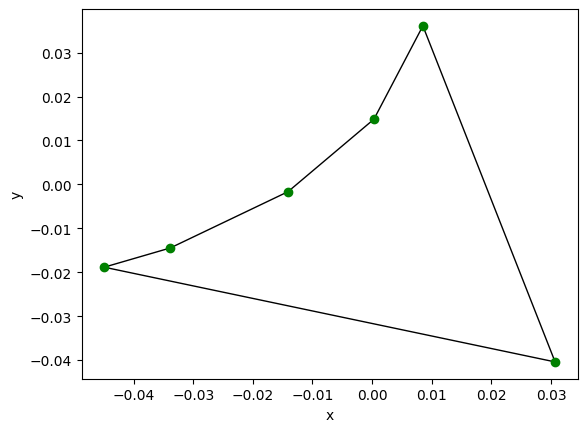

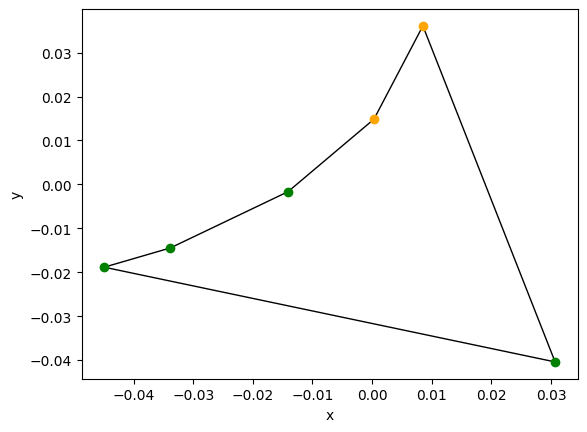

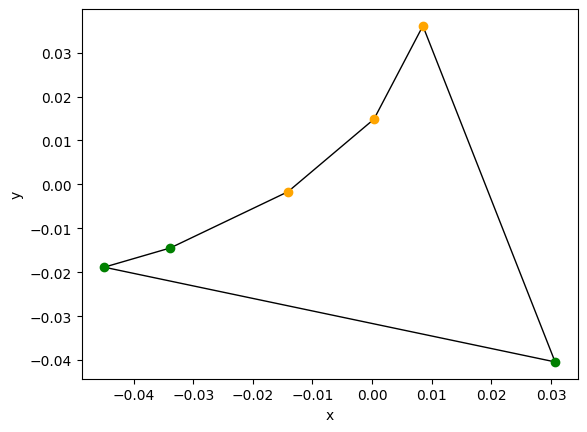

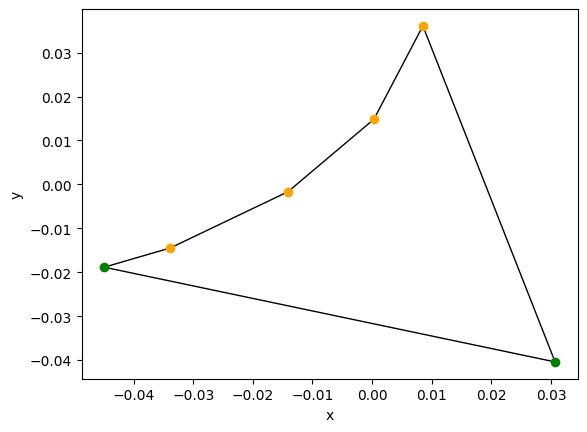

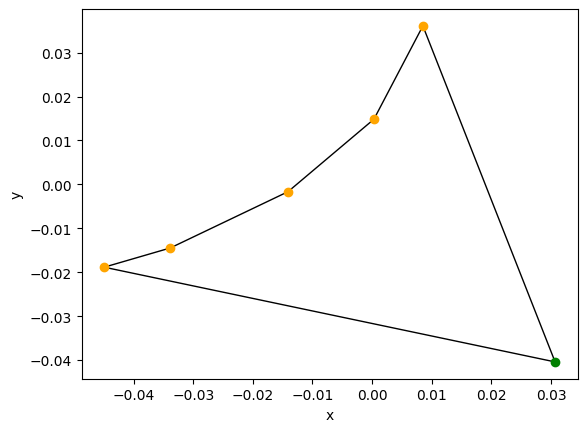

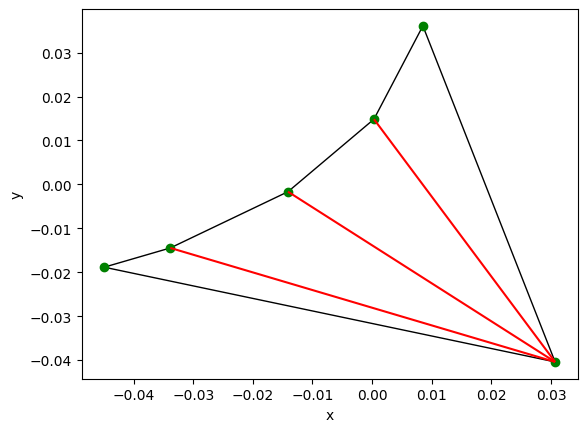

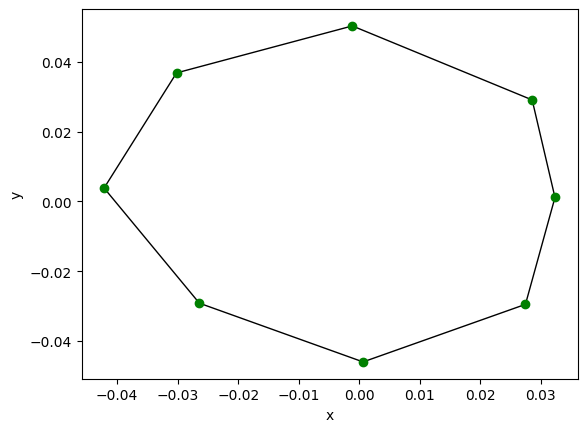

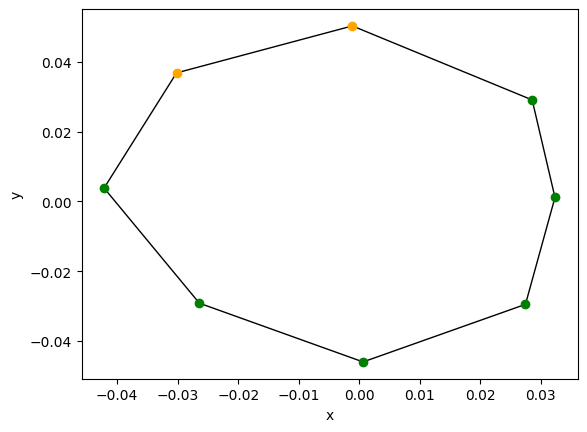

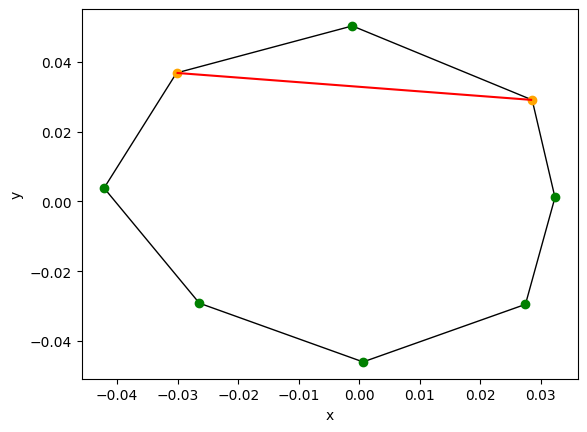

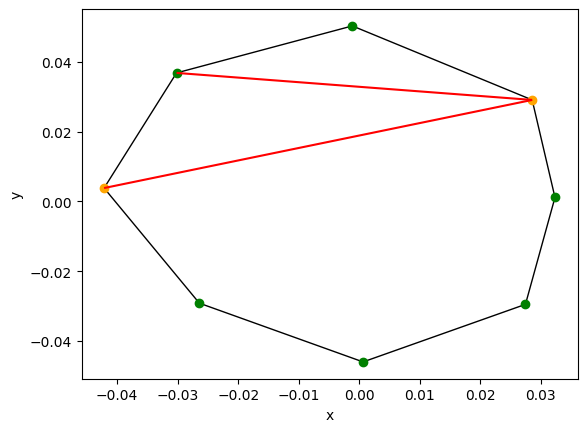

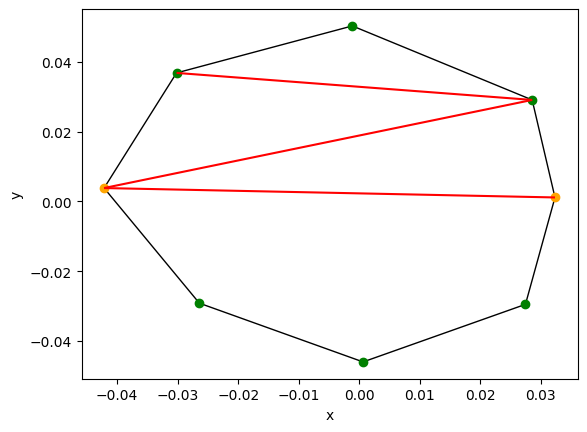

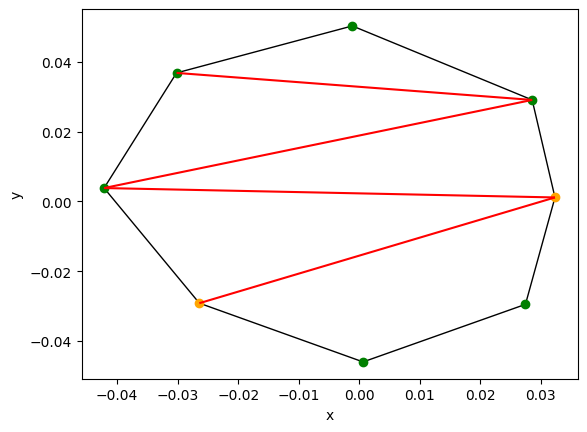

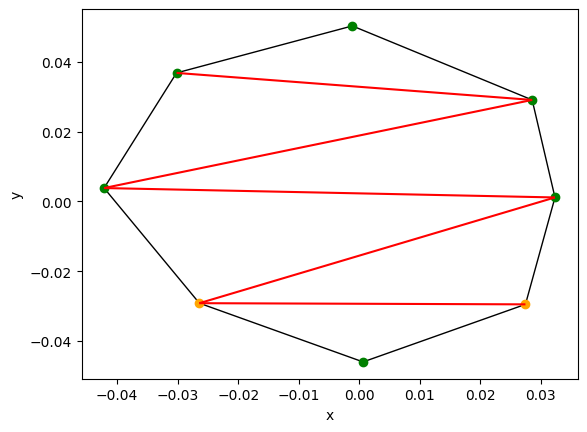

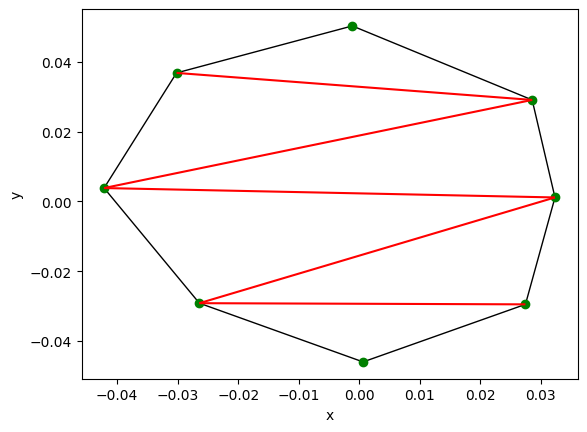

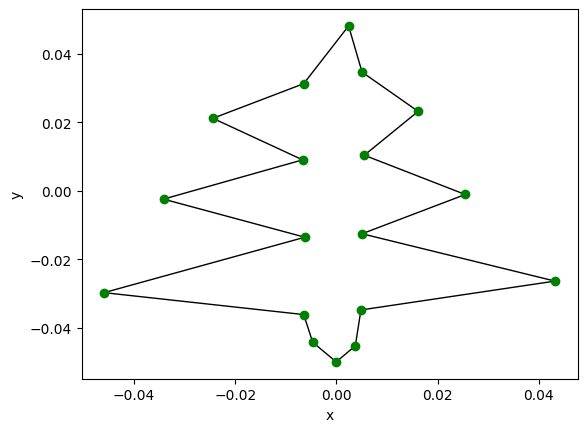

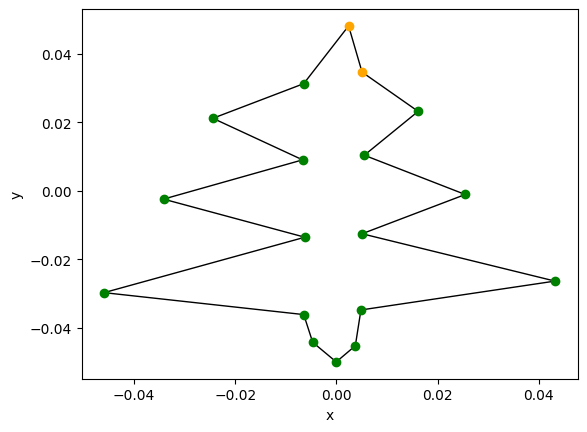

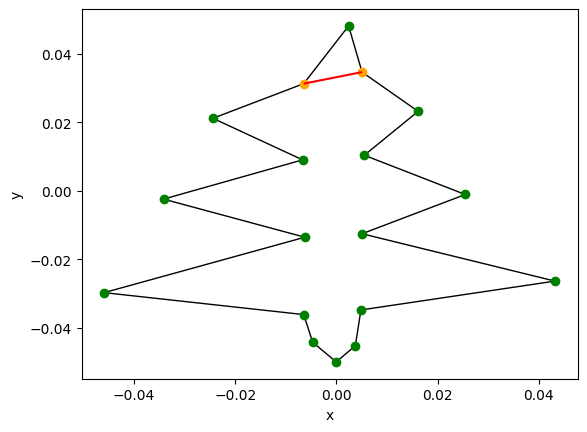

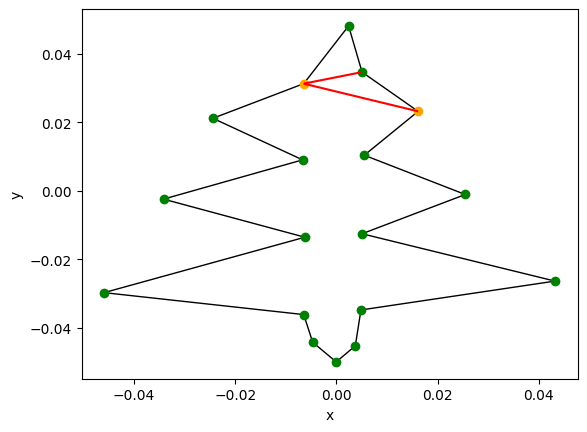

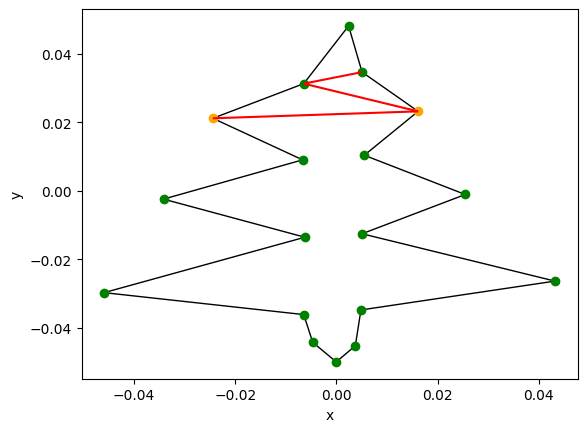

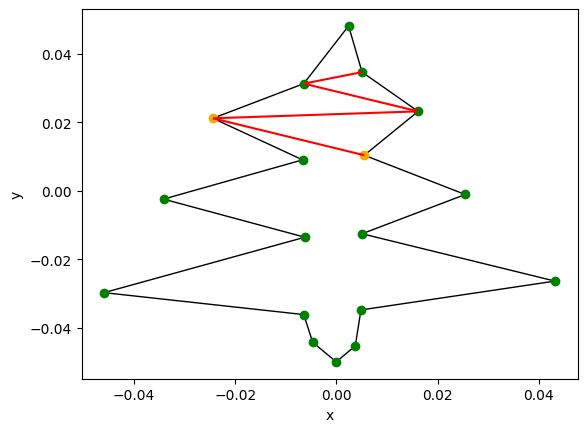

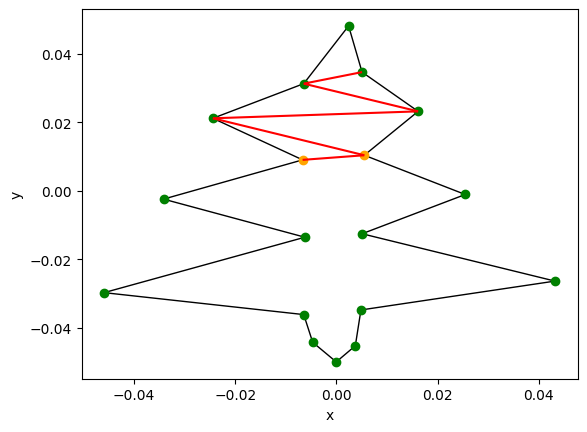

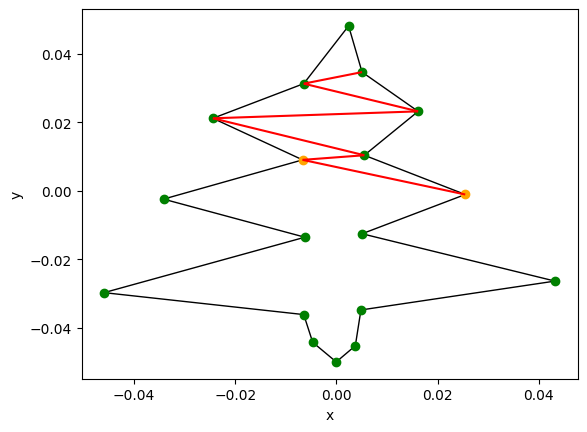

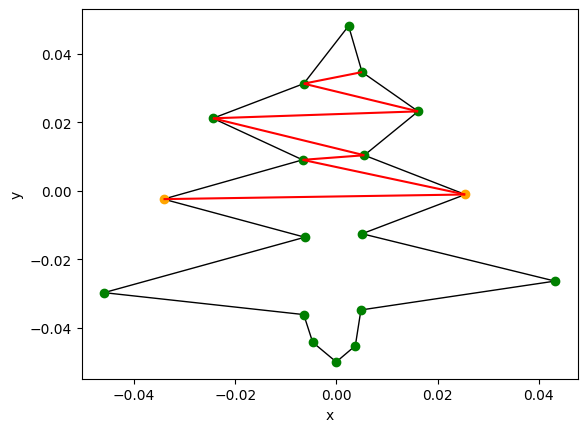

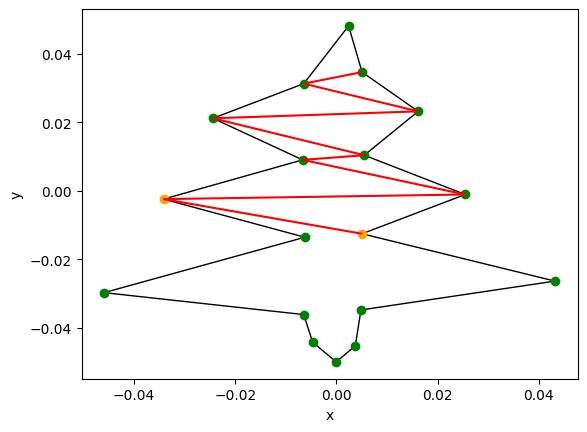

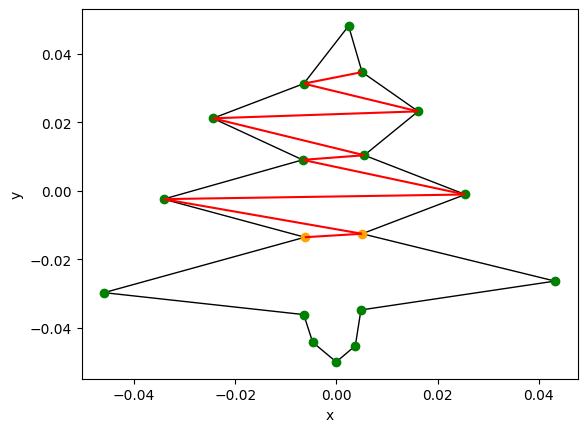

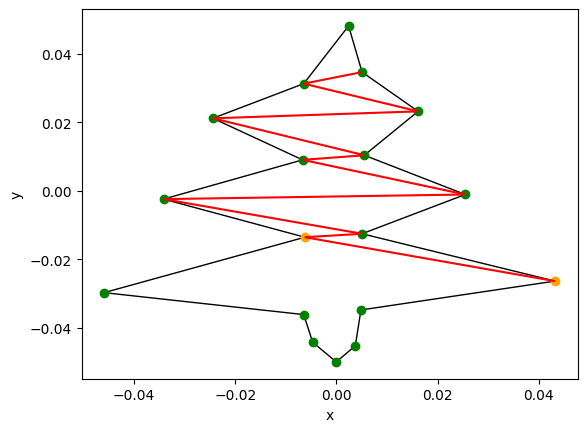

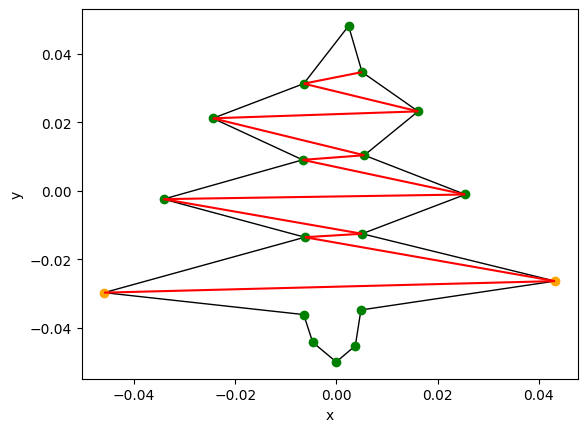

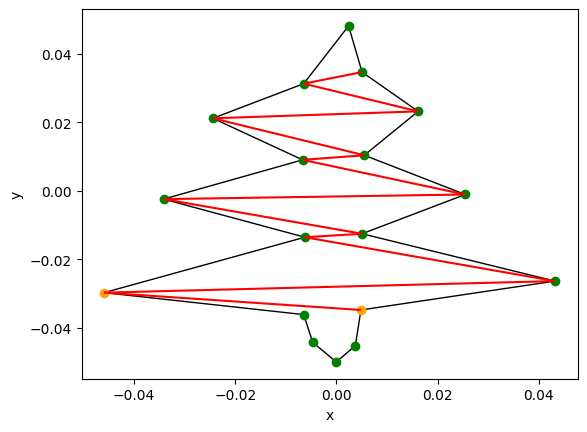

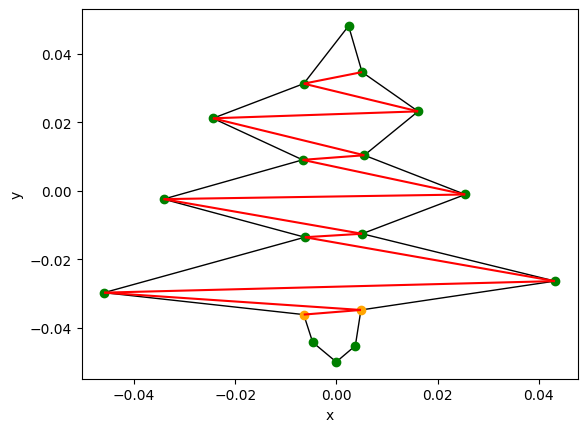

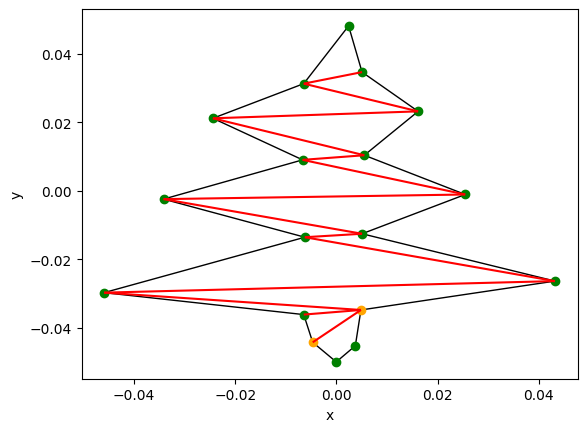

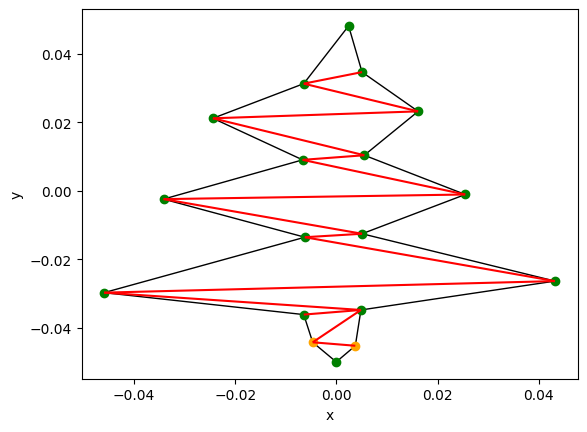

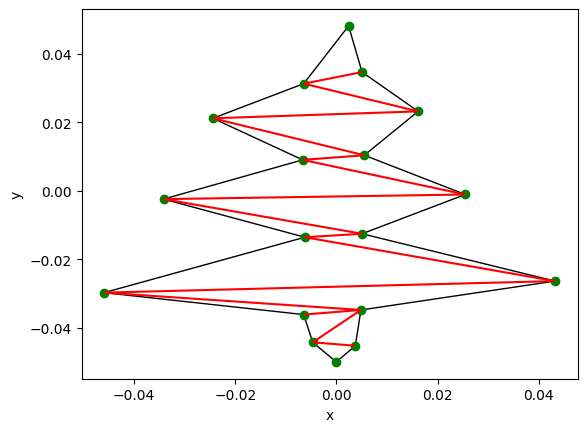

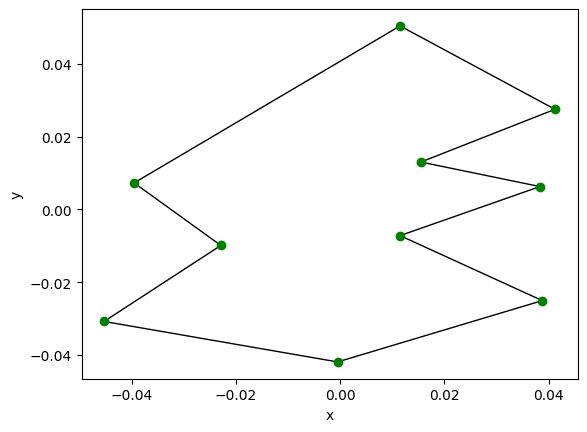

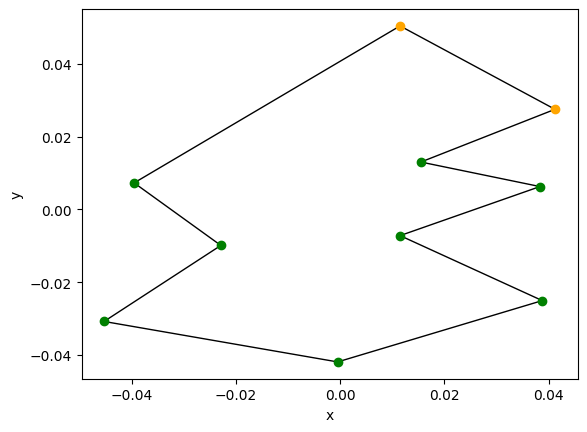

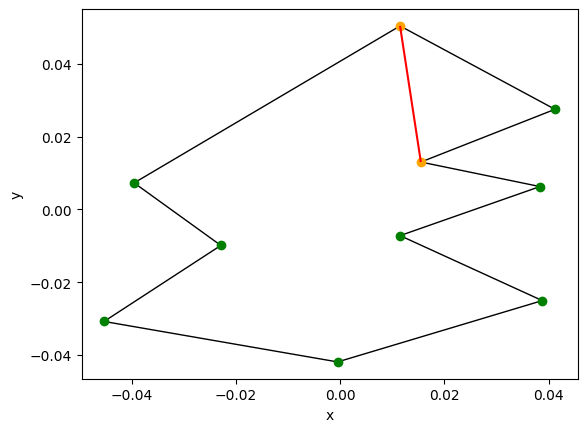

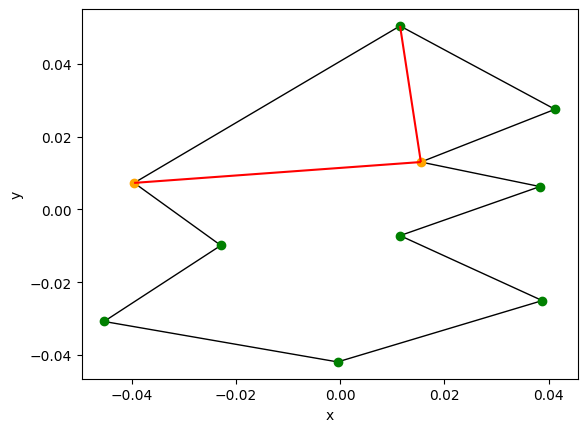

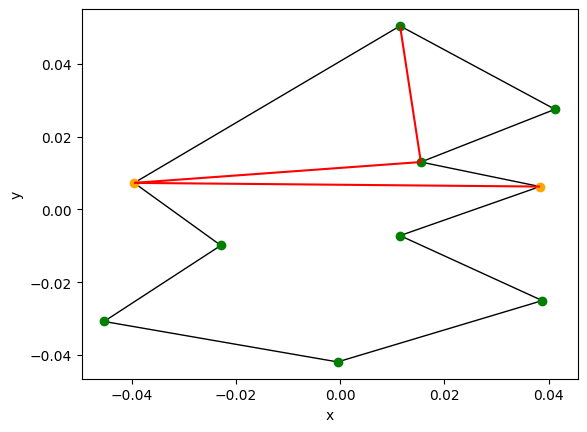

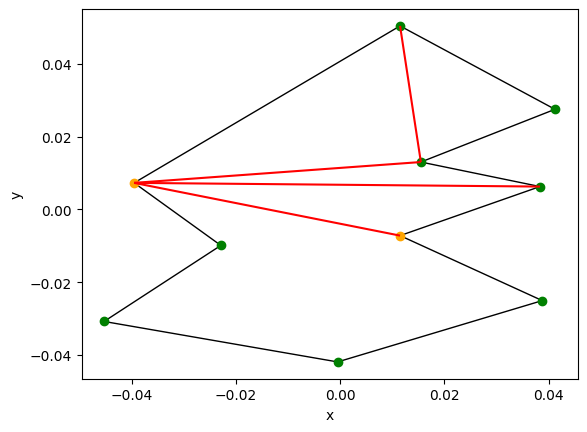

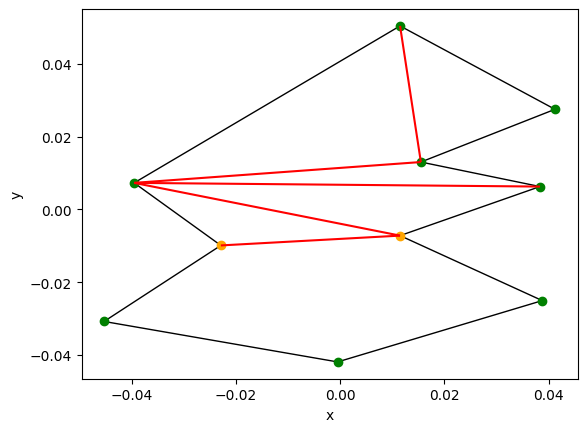

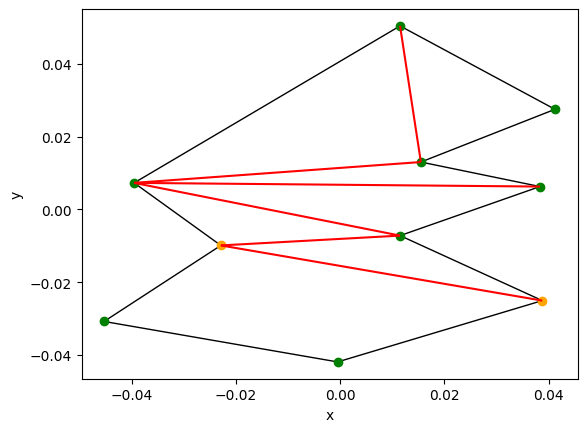

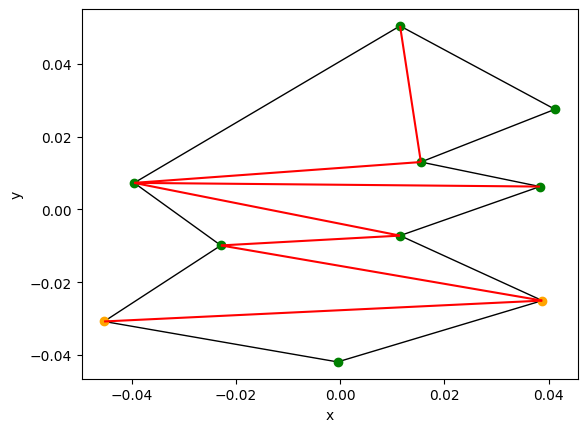

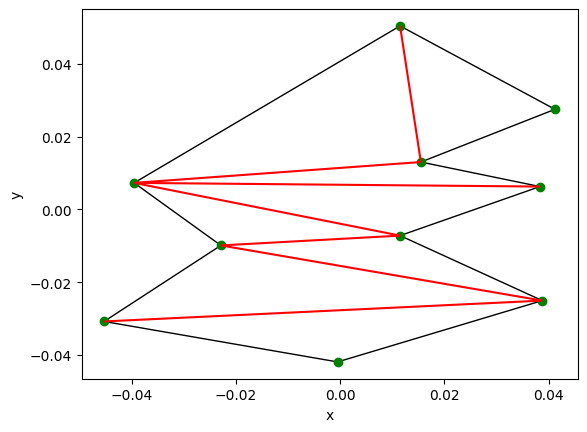

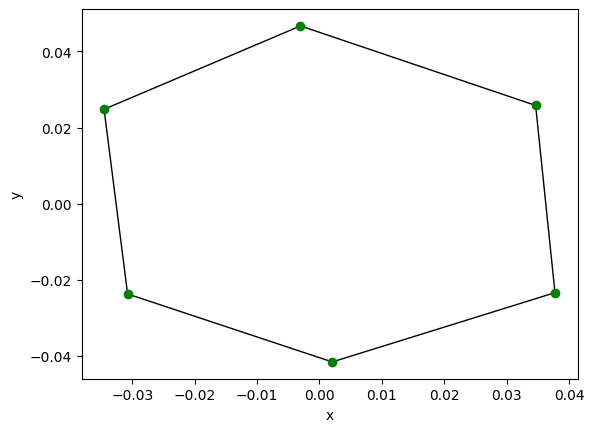

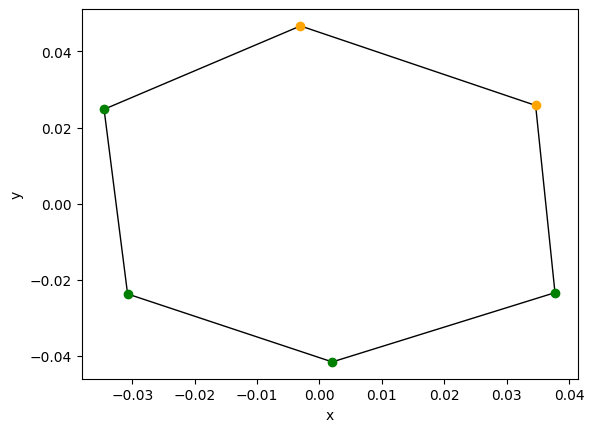

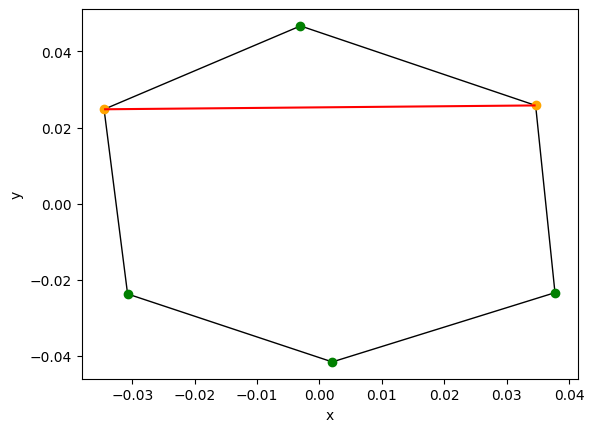

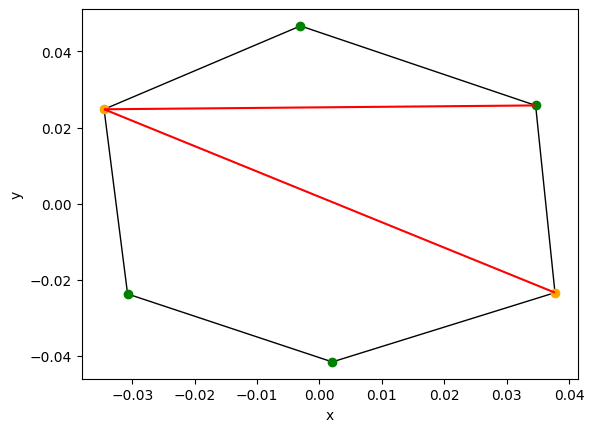

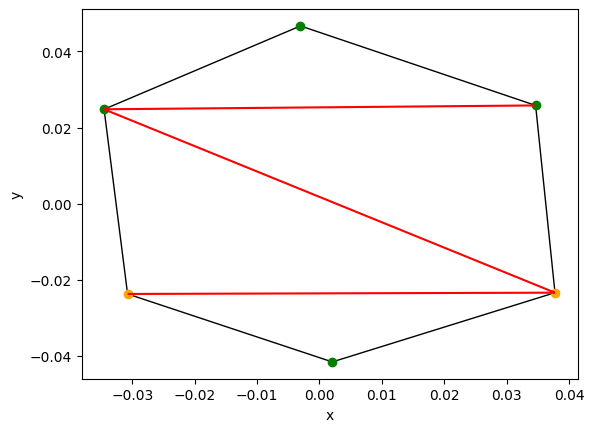

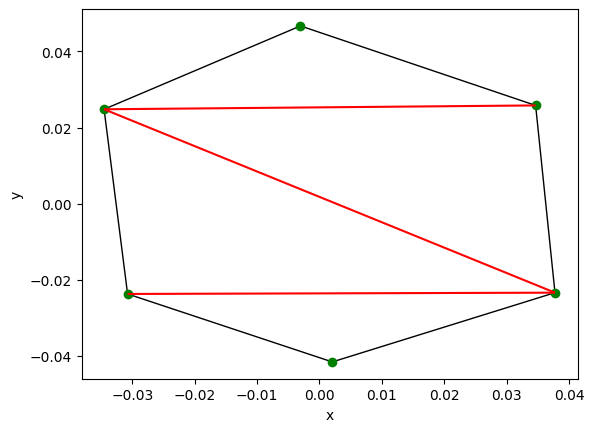

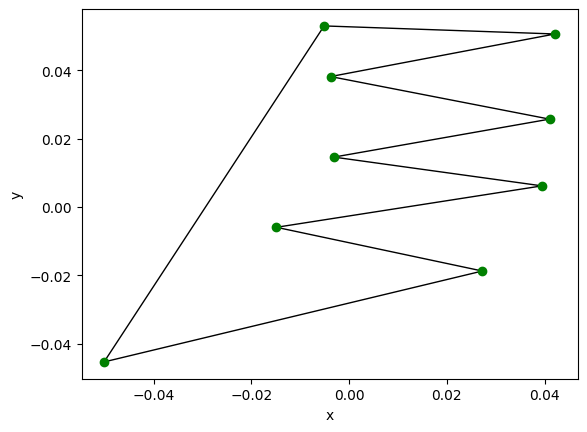

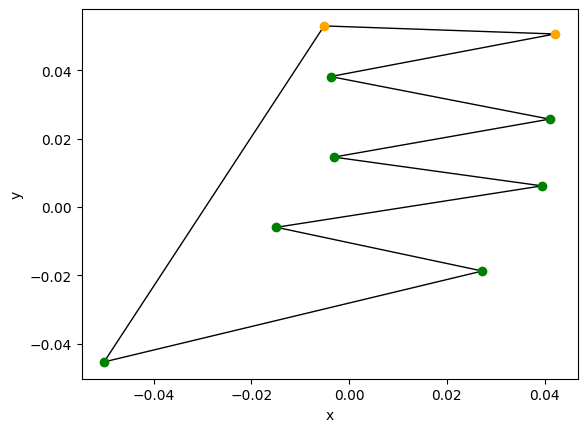

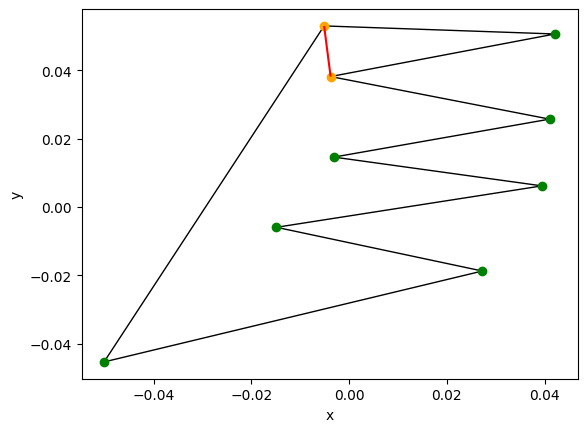

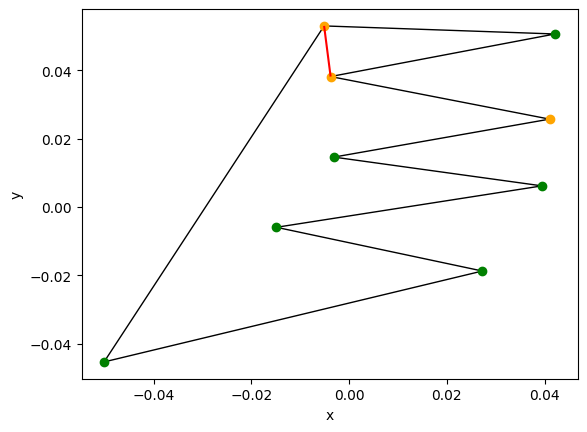

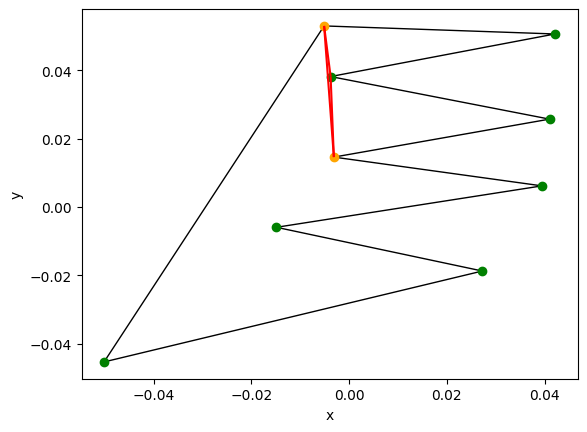

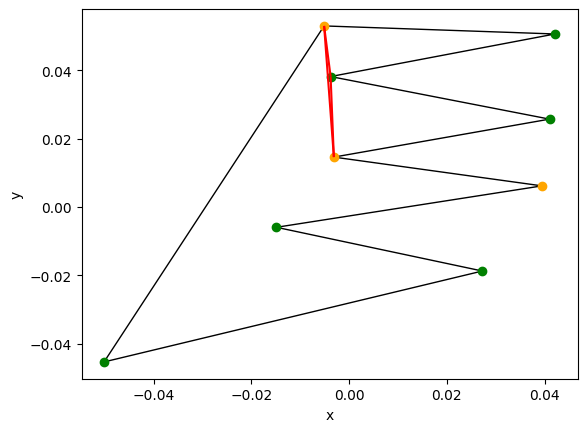

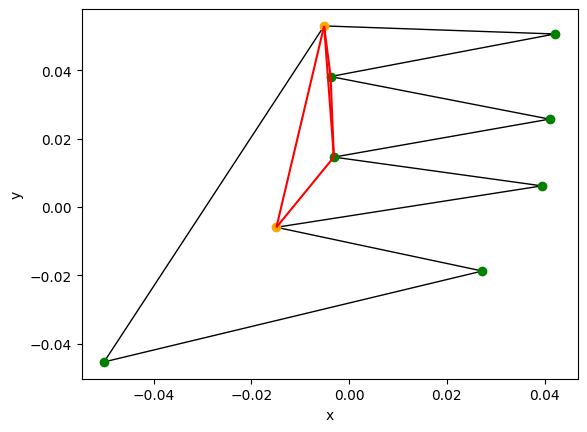

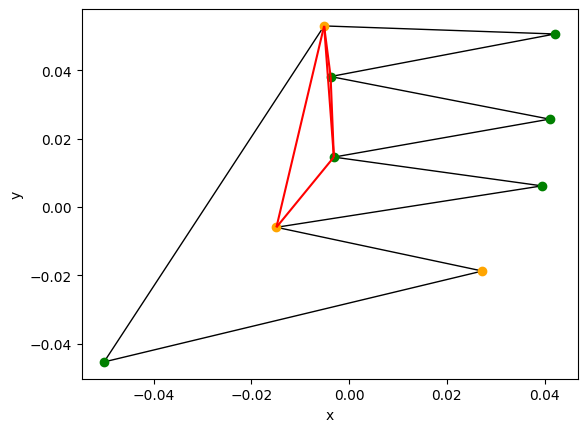

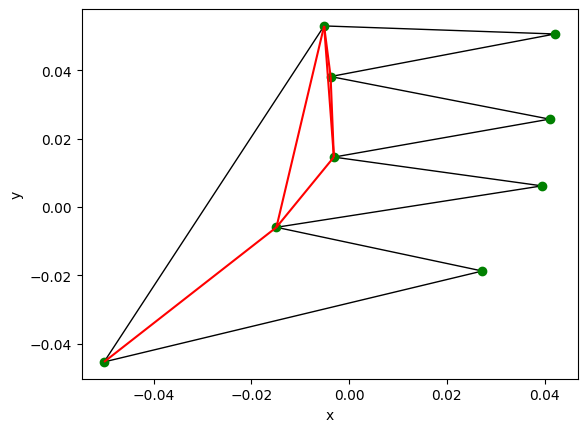

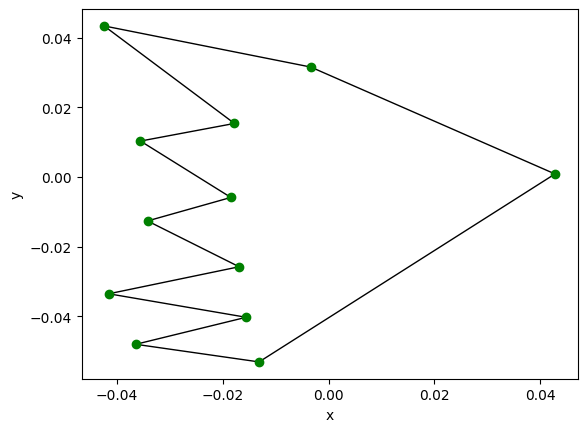

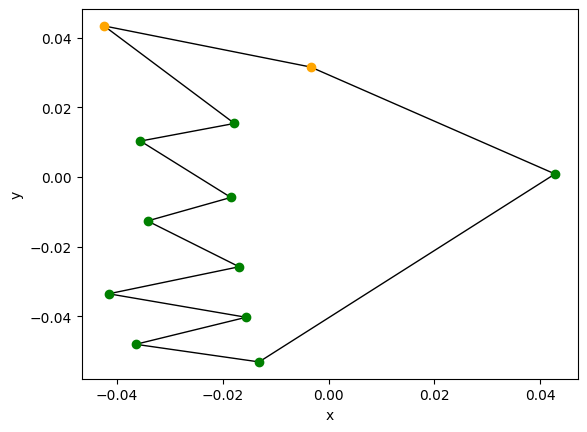

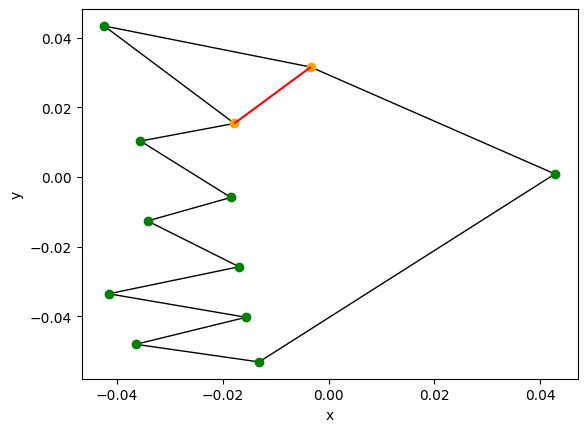

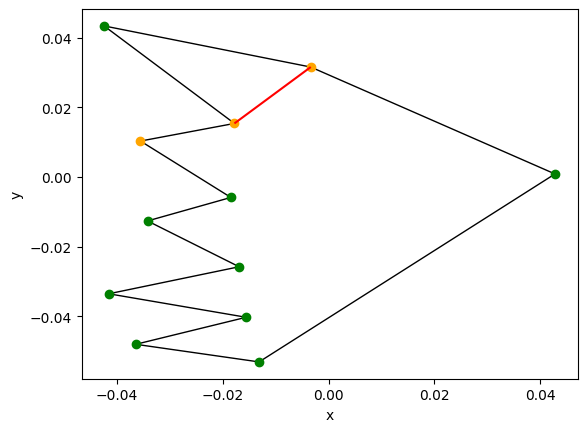

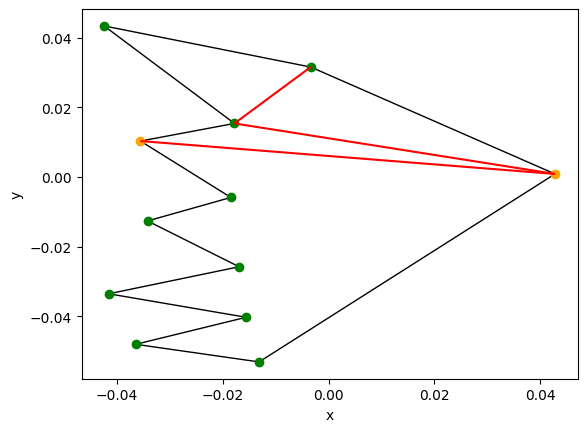

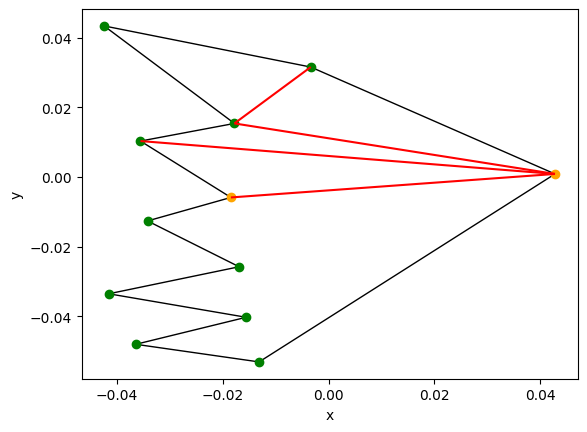

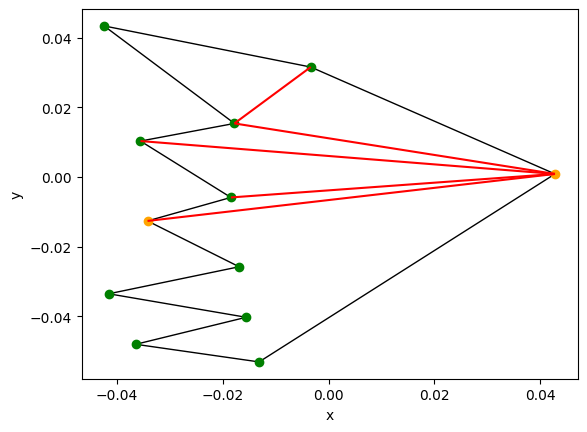

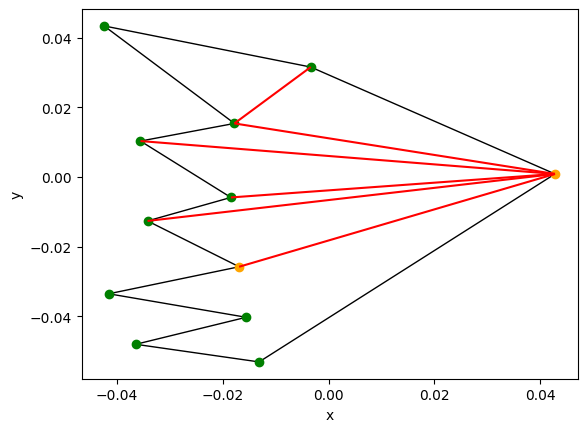

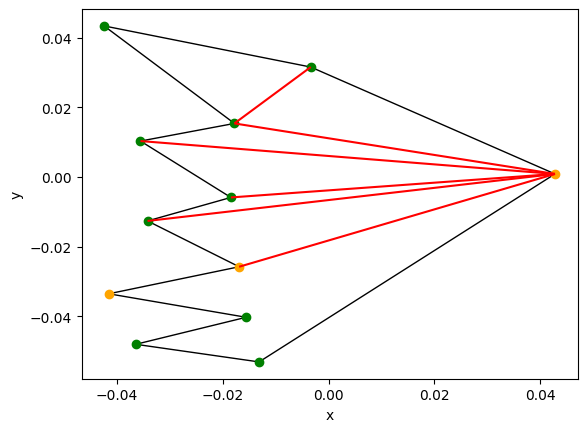

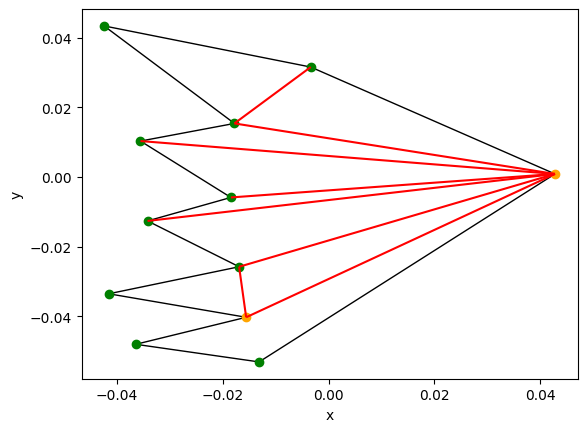

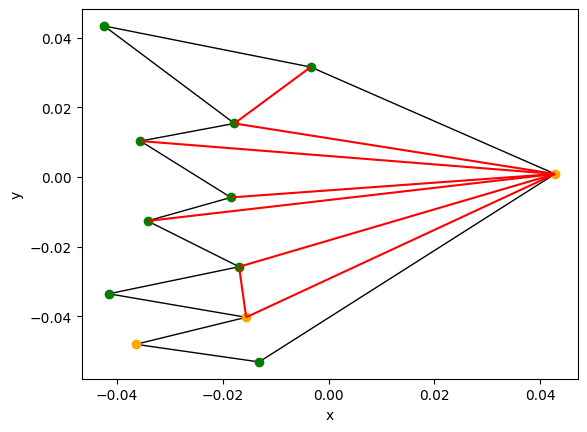

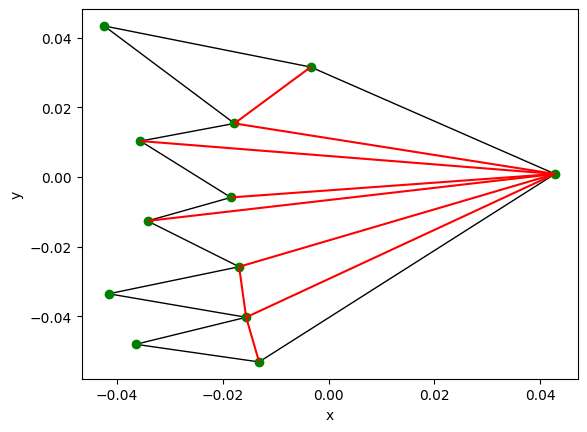

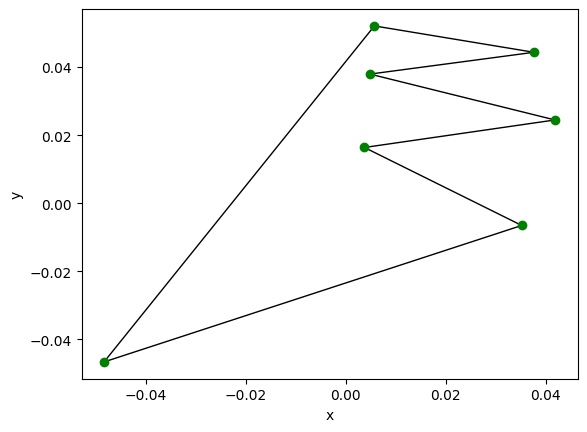

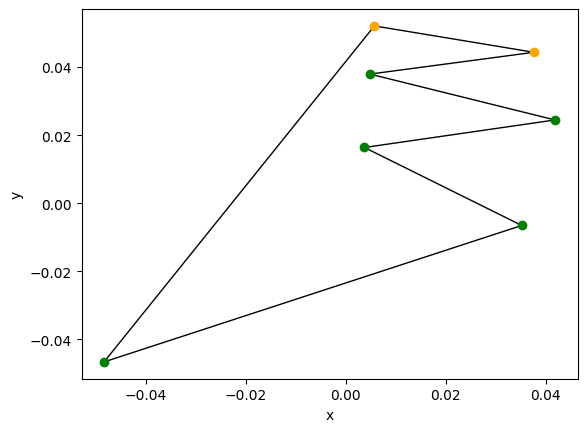

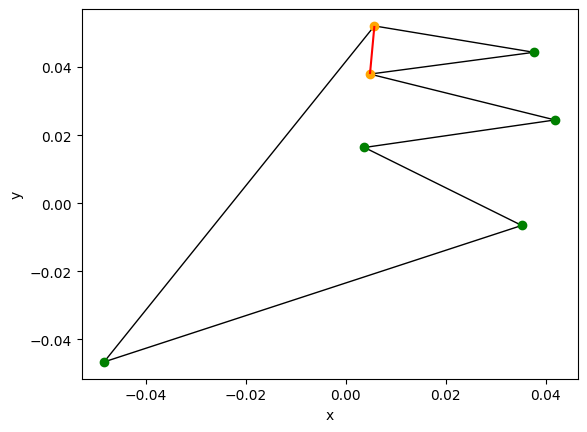

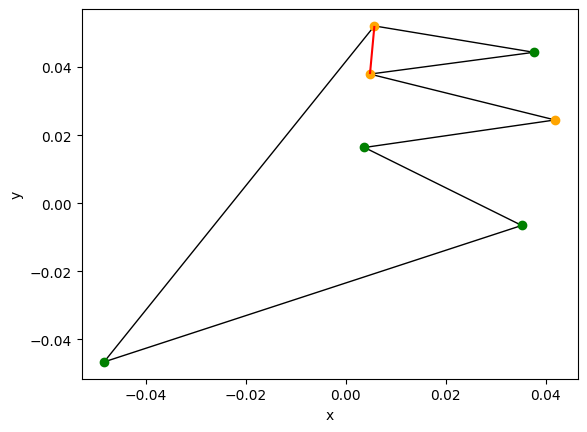

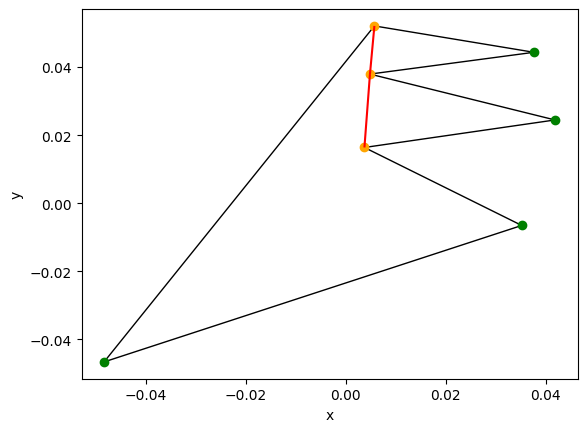

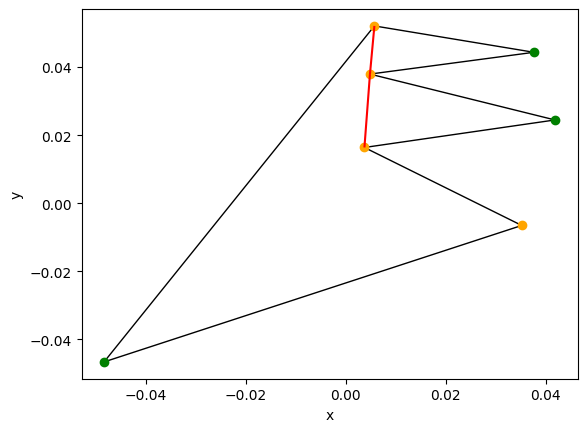

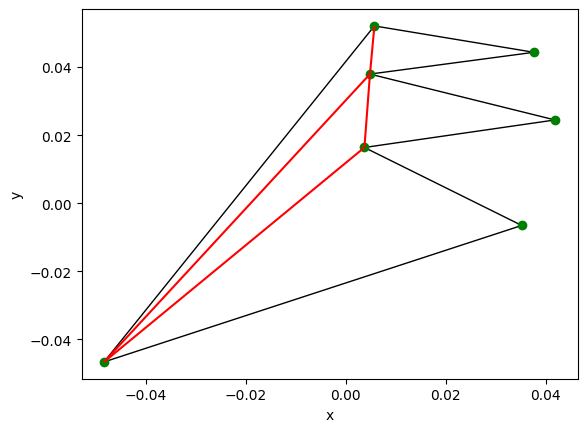

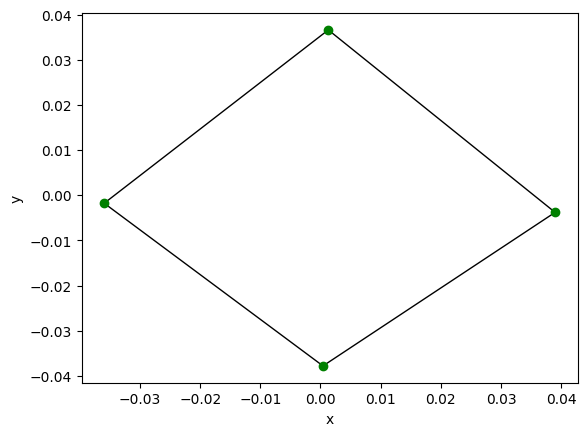

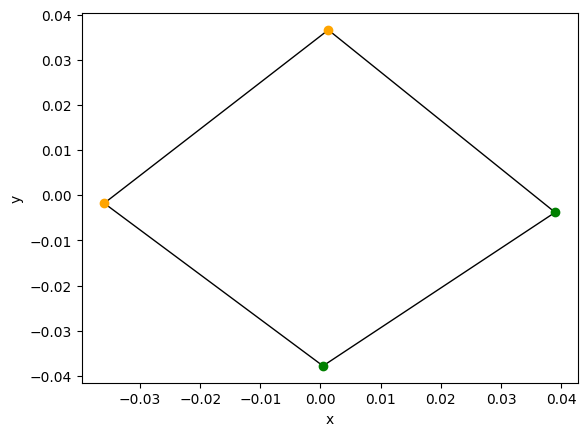

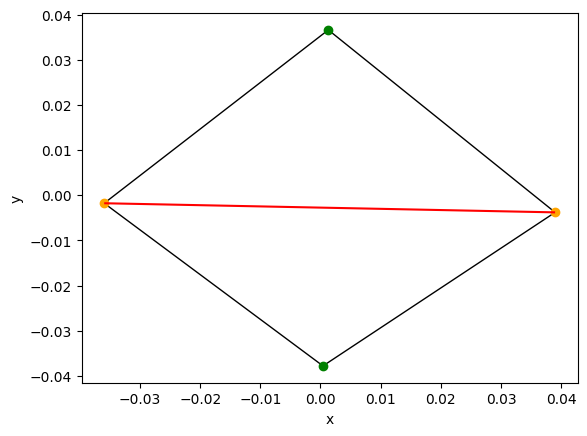

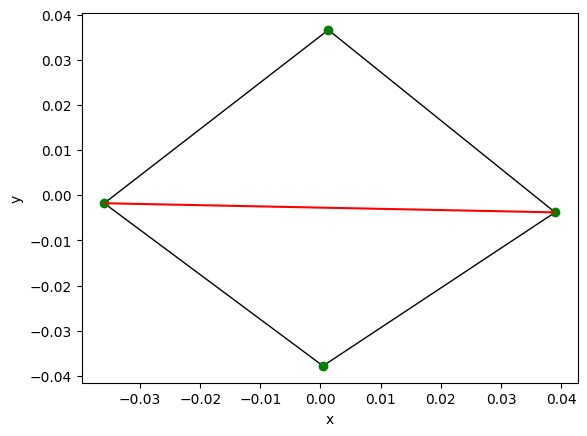

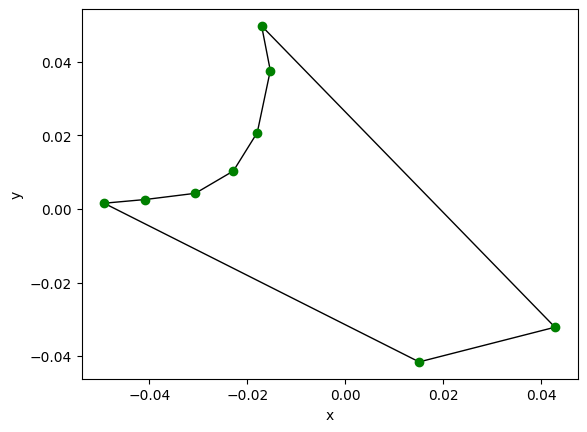

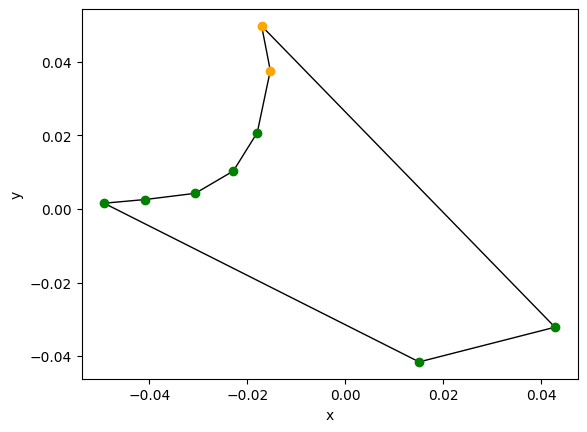

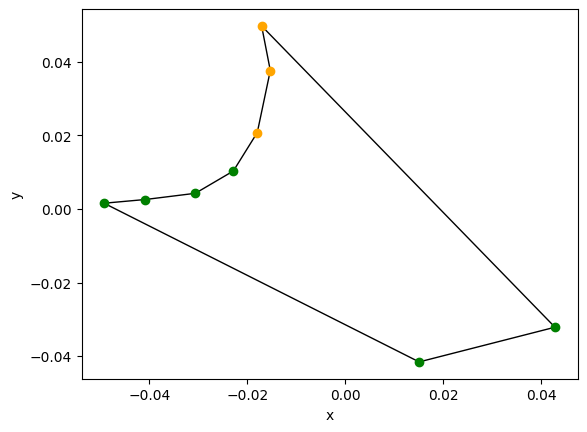

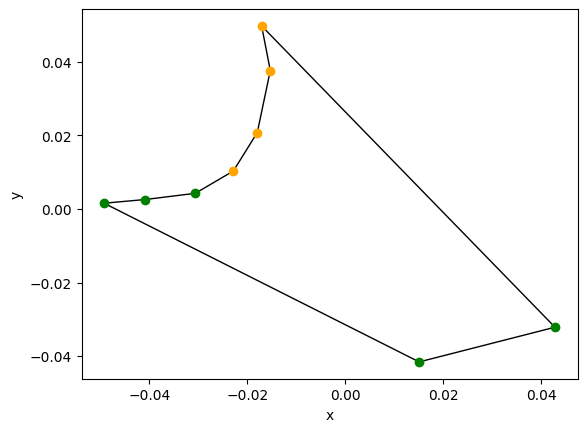

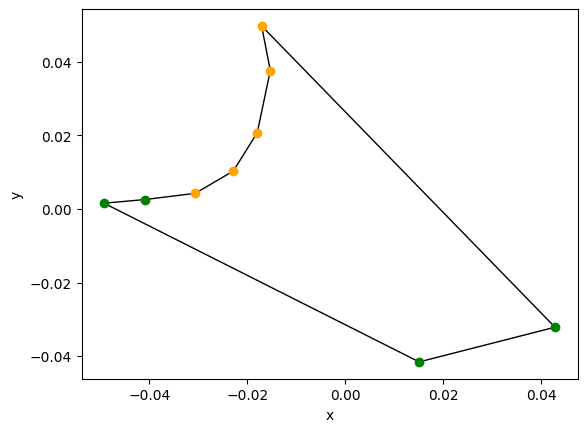

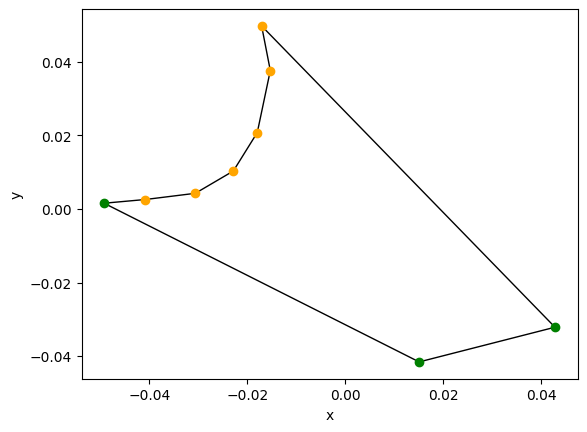

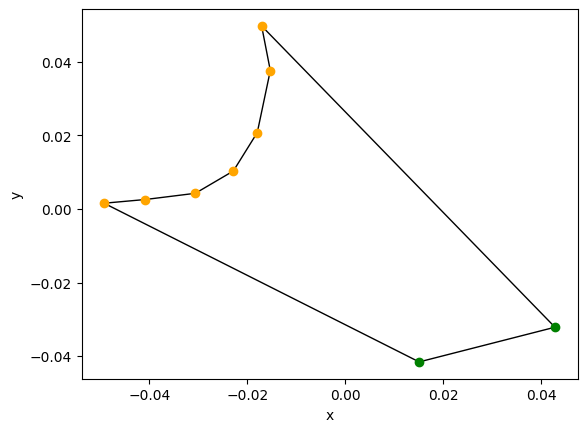

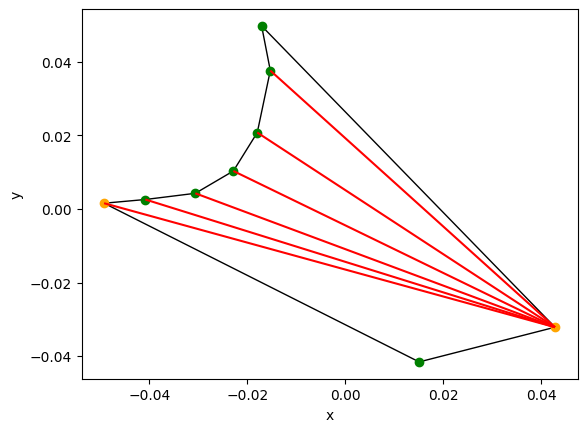

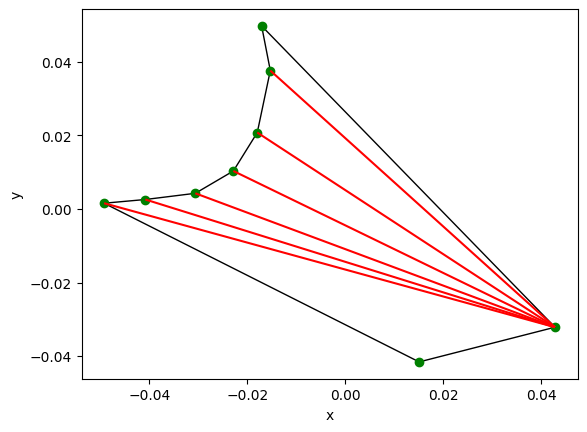

In [307]:
Test().runtest(3, triangulation)

Zwizualizuj powstały wielokąt podzielony na trójkąty.

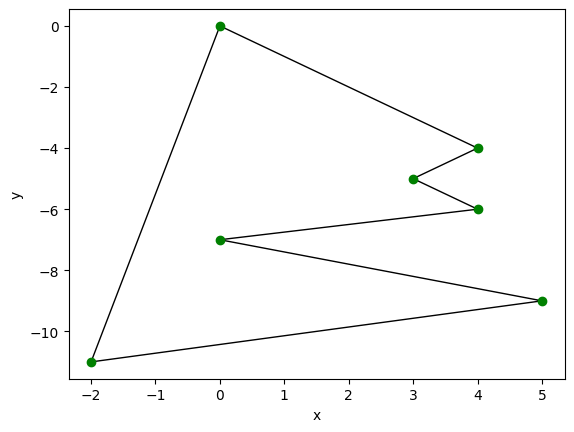

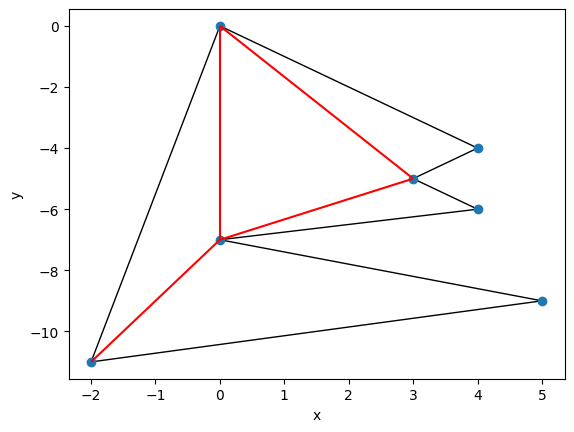

In [308]:
polygon=polygon_mine.copy()
tri = triangulation2(polygon)
draw_polygon_tri(polygon_mine,tri)

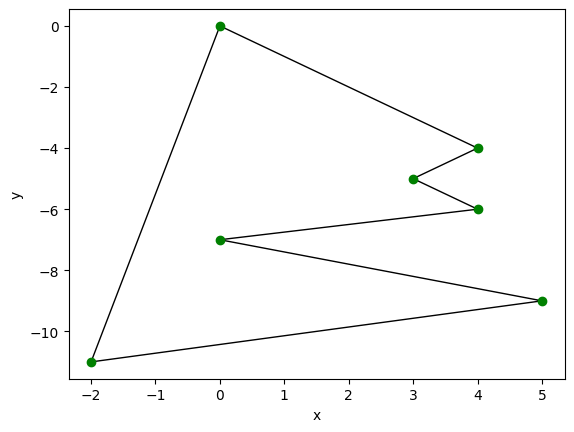

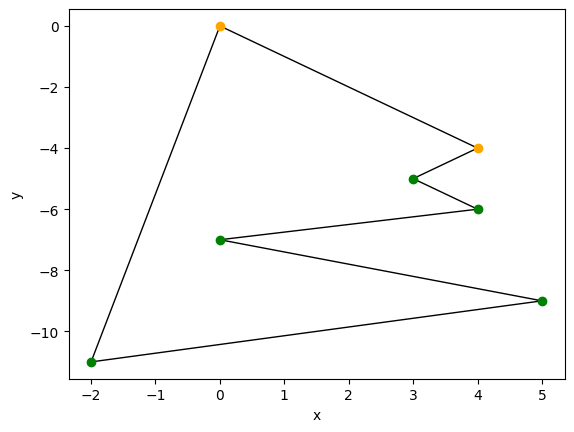

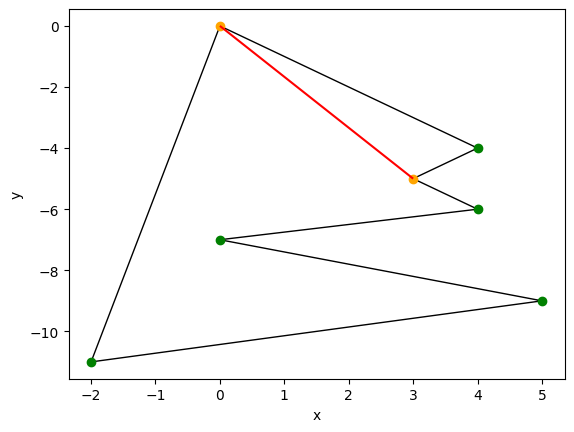

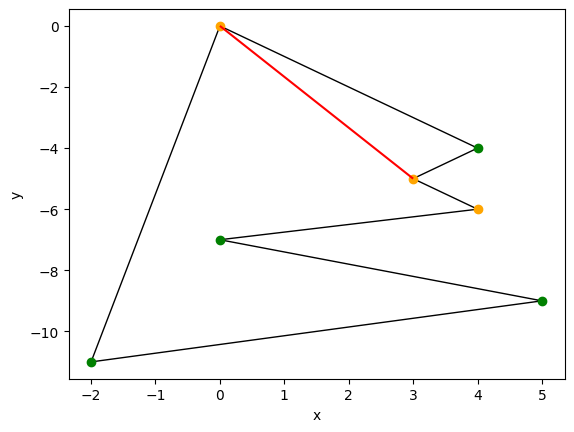

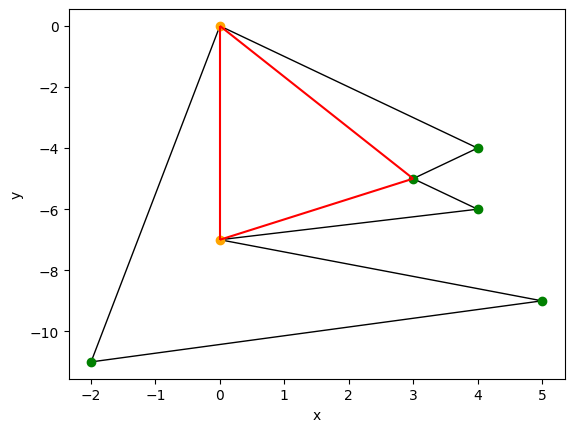

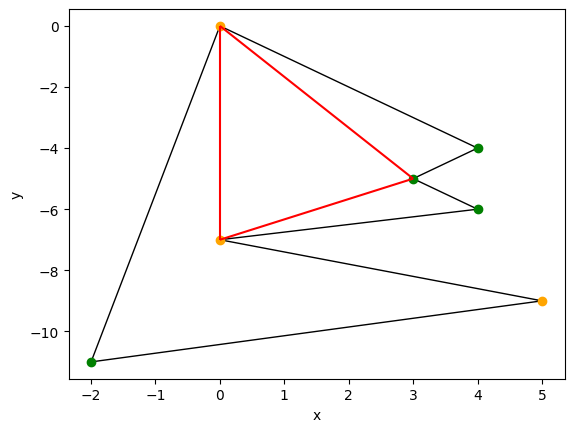

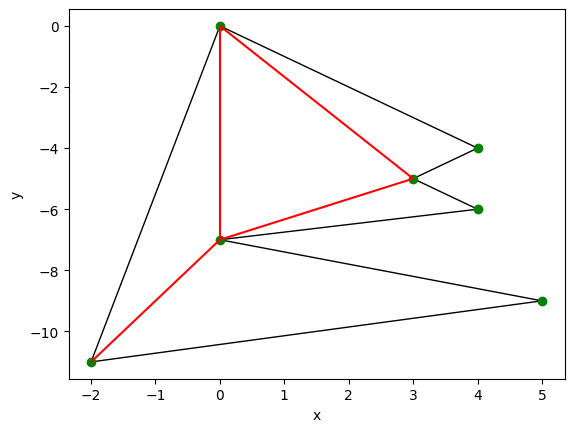

In [309]:
polygon=polygon_mine.copy()
tri = triangulation(polygon)

[(6, 4), (4, 2), (6, 2), (2, 0)]


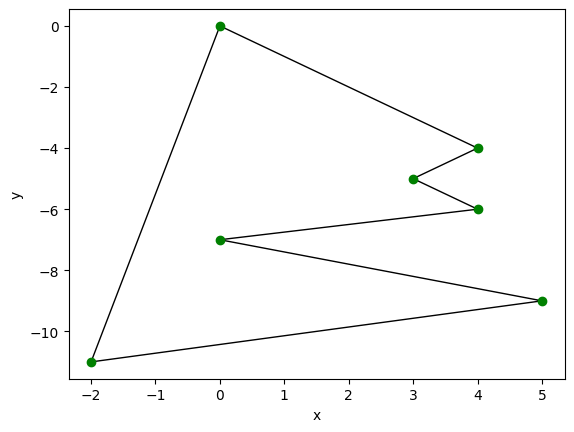

In [310]:
#Zwraca przekątne
polygon=polygon_mine.copy()
tri = triangulation_real(polygon)
print (tri)